# chat gpt 능력을 활용하는 3가지 방법
### ChatGPT
### Bing.com 채팅
### OpenAI API

- Few shot 러닝
  - 모델이 1~5개 정도의 데이터로 학습(고양이와 개를구분한다고하면 고양2장 개2장)
  - 동작방법
    - 거대모델을 사용(GPR, BERT , CLIP) - Pre-trained모델
    - 샘플을 추가해서 미세조정(Fine-tuning) - > Few Shot 데이터를 사용
    - Prompting 활용
      텍스트 : "오늘 날씨가 너무 좋다"
      프롬프트 : " 이 텍스트가 긍정적인가요?"
      답변 : "긍정적입니다."

- Zero Shot 러닝
  - 한개의 예시만으로 학습
- One Shot 러닝
  - 학습없이도 문제를 해결(이 단어가 긍정인지 부정인지 답을제공)


# Few shot 학습예시
  - 문제 : 영화 리뷰가 긍정적인지 부정적인지 구분
  - 샘플데이터
    - 긍정적 리뷰 : " 이 영화는 정말 재미있어요"
    - 부정적 리뷰 : " 너무 지루해서 중간에 나왔어요"

In [ ]:
# 주석은 컴퓨터가 인지하지않는 우리가 사용하는 설명문
# 컴퓨터에게 명령을 내리는 문장을작성 -- > 코딩 -> 서로간의 합의에 의한 규칙을 실행
# 문자열
'문자열'
"문자열"
'''줄바꿈을 포함한 여러개
한줄
두줄'''

2

Few-shot Prompt 기반 학습

In [ ]:
from transformers import GPT2Tokenizer, GPTNeoForCausalLM


# GPT-2 모델 및 토크나이저 불러오기
tokenizer = GPT2Tokenizer.from_pretrained('minhtoan/gpt3-small-finetune-cnndaily-news')
model = GPTNeoForCausalLM.from_pretrained('minhtoan/gpt3-small-finetune-cnndaily-news')


# pad_token_id를 eos_token_id와 동일하게 설정
model.config.pad_token_id = model.config.eos_token_id

# few-shot 학습을 위한 프롬프트 작성 (예시 포함)
few_shot_prompt = """
Q: What's the capital of France?
A: Paris.

Q: Who wrote 'Romeo and Juliet'?
A: William Shakespeare.

Q: What is the largest planet in our solar system?
A: Jupiter.

Q: Who is the current president of the United States?
A:
"""

# 텍스트 인코딩
encoded_input = tokenizer(few_shot_prompt, return_tensors='pt')

# 모델의 출력 생성
output = model.generate(
    **encoded_input,
    max_length=150,  # 출력의 최대 길이 설정
    num_return_sequences=1,  # 생성할 출력 수
    no_repeat_ngram_size=2,  # 반복되는 n-그램 방지
    top_p=0.95,  # top-p 샘플링
    top_k=50  # top-k 샘플링
)

# 출력 텍스트 디코딩
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)

# 결과 출력
print(generated_text)


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.



Q: What's the capital of France?
A: Paris.

Q: Who wrote 'Romeo and Juliet'?
A: William Shakespeare.

Q: What is the largest planet in our solar system?
A: Jupiter.

Q: Who is the current president of the United States?
A: 
President Obama .
Obama is a former president .  The former England captain has been in the spotlight since the World Cup . The England international has scored just one goal in his last seven games . England's captain Chris Robshaw has also been linked with a move to the Premier League . Robshaws has played just once in England’s last six games, and has not scored a


In [ ]:
from transformers import GPT2Tokenizer, GPTNeoForCausalLM


# GPT-2 모델 및 토크나이저 불러오기
tokenizer = GPT2Tokenizer.from_pretrained('minhtoan/gpt3-small-finetune-cnndaily-news')
model = GPTNeoForCausalLM.from_pretrained('minhtoan/gpt3-small-finetune-cnndaily-news')


# pad_token_id를 eos_token_id와 동일하게 설정
model.config.pad_token_id = model.config.eos_token_id

# few-shot 학습을 위한 프롬프트 작성 (예시 포함)
few_shot_prompt = """
  영어: "How are you?"
  한국어: "어떻게 지내세요?"
  영어: "What is your name?"
  한국어: "당신의 이름은 무엇인가요?"
  영어: "What is Few-Shot?"
  한국어 : "Few-Shot 은 적은데이터로 모델을 학습하는 방법입니다."
  영어: "I am learning Few-Shot prompting"
  한국어:
"""

# 텍스트 인코딩
encoded_input = tokenizer(few_shot_prompt, return_tensors='pt')

# 모델의 출력 생성
output = model.generate(
    **encoded_input,
    max_length=300,  # 출력의 최대 길이 설정
    num_return_sequences=1,  # 생성할 출력 수
    no_repeat_ngram_size=2,  # 반복되는 n-그램 방지
    top_p=0.95,  # top-p 샘플링
    top_k=50  # top-k 샘플링
)

# 출력 텍스트 디코딩
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)

# 결과 출력
print(generated_text)


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.



  영어: "How are you?"
  한국어: "어떻게 지내세요?"
  영어: "What is your name?"
  한국어: "당신의 이름은 무엇인가요?"
  영어: "What is Few-Shot?"
  한국어 : "Few-Shot 은 적은데이터로 모델을 학습하는 방법입니다."
  영어: "I am learning Few-Shot prompting"
  한국어:
"I have learned that the world is not a place where you can be a hero" 
The video was filmed by a man who was in the video for the film, who is now a professional actor .
He was filming the scene in a small town in New York, New Jersey, when he was shot .  The video has been viewed more than 1.5 million times


In [ ]:
!pip install -q transformers torch

In [ ]:
from transformers import MarianMTModel, MarianTokenizer

# 모델과 토크나이저 로드
model_name = "Helsinki-NLP/opus-mt-ko-en"
model = MarianMTModel.from_pretrained(model_name)
tokenizer = MarianTokenizer.from_pretrained(model_name)

# 한국어 텍스트 예시
korean_text = '''
대통령실은 1일 더불어민주당이 국회 예산결산특별위원회에서
단독 처리한 내년도 예산 감액안을 철회하지 않으면 추가 협상이 불가능하다고 밝혔다.
'''

# 텍스트 토큰화
translated = tokenizer(korean_text, return_tensors="pt", padding=True)

# 번역 수행
translation = model.generate(**translated)

# 결과 디코딩
translated_text = tokenizer.decode(translation[0], skip_special_tokens=True)

# 번역된 텍스트 출력
print("번역 결과:", translated_text)


번역 결과: The president's office, along with the first day, revealed that further negotiations could not be made without the next year's budget reduction which the Democrats handled alone by the National Council's Special Commission on Economic Distinguished.


streamlit 사용하기

In [ ]:
!pip install -q streamlit transformers torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.3 MB/s eta 0:00:00


In [ ]:
# app.py
import streamlit as st
from transformers import MarianMTModel, MarianTokenizer

# 모델과 토크나이저 로드
model_name = "Helsinki-NLP/opus-mt-ko-en"
model = MarianMTModel.from_pretrained(model_name)
tokenizer = MarianTokenizer.from_pretrained(model_name)

# Streamlit 앱 제목 설정
st.title("한국어 → 영어 번역기")

# 사용자가 입력할 한국어 텍스트 받기
korean_text = st.text_area("한국어 텍스트를 입력하세요", height=150)

# 번역 버튼 클릭 시 번역 수행
if st.button("번역하기"):
    if korean_text:
        # 텍스트 토큰화
        translated = tokenizer(korean_text, return_tensors="pt", padding=True)

        # 번역 수행
        translation = model.generate(**translated)

        # 결과 디코딩
        translated_text = tokenizer.decode(translation[0], skip_special_tokens=True)

        # 번역된 텍스트 출력
        st.subheader("번역 결과:")
        st.write(translated_text)
    else:
        st.warning("번역할 텍스트를 입력해주세요.")


/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
2024-12-01 07:20:45.225 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-01 07:20:45.405 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-12-01 07:20:45.408 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-01 07:20:45.411 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-01 07:20:45.414 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-01 07:20:45.416 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored

In [ ]:
# app.py 파일 내용을 작성하여 저장하는 코드
app_code = """
import streamlit as st
from transformers import MarianMTModel, MarianTokenizer

# 모델과 토크나이저 로드
model_name = "Helsinki-NLP/opus-mt-ko-en"
model = MarianMTModel.from_pretrained(model_name)
tokenizer = MarianTokenizer.from_pretrained(model_name)

# Streamlit 앱 제목 설정
st.title("한국어 → 영어 번역기")

# 사용자가 입력할 한국어 텍스트 받기
korean_text = st.text_area("한국어 텍스트를 입력하세요", height=150)

# 번역 버튼 클릭 시 번역 수행
if st.button("번역하기"):
    if korean_text:
        # 텍스트 토큰화
        translated = tokenizer(korean_text, return_tensors="pt", padding=True)

        # 번역 수행
        translation = model.generate(**translated)

        # 결과 디코딩
        translated_text = tokenizer.decode(translation[0], skip_special_tokens=True)

        # 번역된 텍스트 출력
        st.subheader("번역 결과:")
        st.write(translated_text)
    else:
        st.warning("번역할 텍스트를 입력해주세요.")
"""

# 파일로 저장
file_path = '/content/app.py'
with open(file_path, 'w') as f:
    f.write(app_code)

# 파일 다운로드 링크 생성
from google.colab import files
files.download(file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

- 서버형태 또는 웹형태로 서비스 하려면 코렙에서는 거의 불가능하다.
- 왜냐면 코렙은 구글의 서버로서 외부로 서비스하는걸 막아놓음
- 개발은 코렙에서 gpt를 이용해서 완료하면
- 실행은 로컬에서 실행한다.
- 실행방법은 파이썬을 설치하고.. 오류가 나면 gpt를 이용해서 해결방안을 얻어서 사용 - 주로 라이브러리를 install하는 문제가 다수임

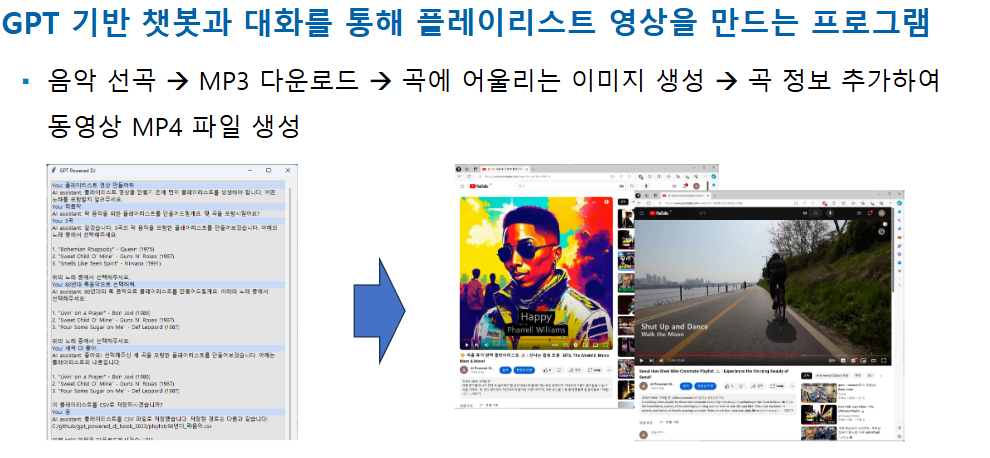

- 문장을 입력하면.. 해당 문장과 어울리는 그림을 만들어주는 프로그램
   - 내가 필요로 하는게 무엇인가? 리스트 업
    - 그림을 생성해 주는 모델이 필요(유로 / 무료)
    - 그림을 생성해 주는 모델이 생성하는 그림은 어떤 형태고 성능이 어느정도인지 확인
    - 내가 물어보는 문장을 가지고 그림으로 표현해주는 모델    
   - 단계적으로 물어보고 확인하기

- 런타임을 GPU로 변경하고 사용을 권장   

In [ ]:
!pip install -q diffusers --upgrade

In [ ]:
!pip install -q invisible_watermark transformers accelerate safetensors

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 41.1 MB/s eta 0:00:00


In [ ]:
from diffusers import DiffusionPipeline
import torch

pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, use_safetensors=True, variant="fp16")
pipe.to("cuda")

# if using torch < 2.0
# pipe.enable_xformers_memory_efficient_attention()

prompt = "An astronaut riding a green horse"

images = pipe(prompt=prompt).images[0]


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

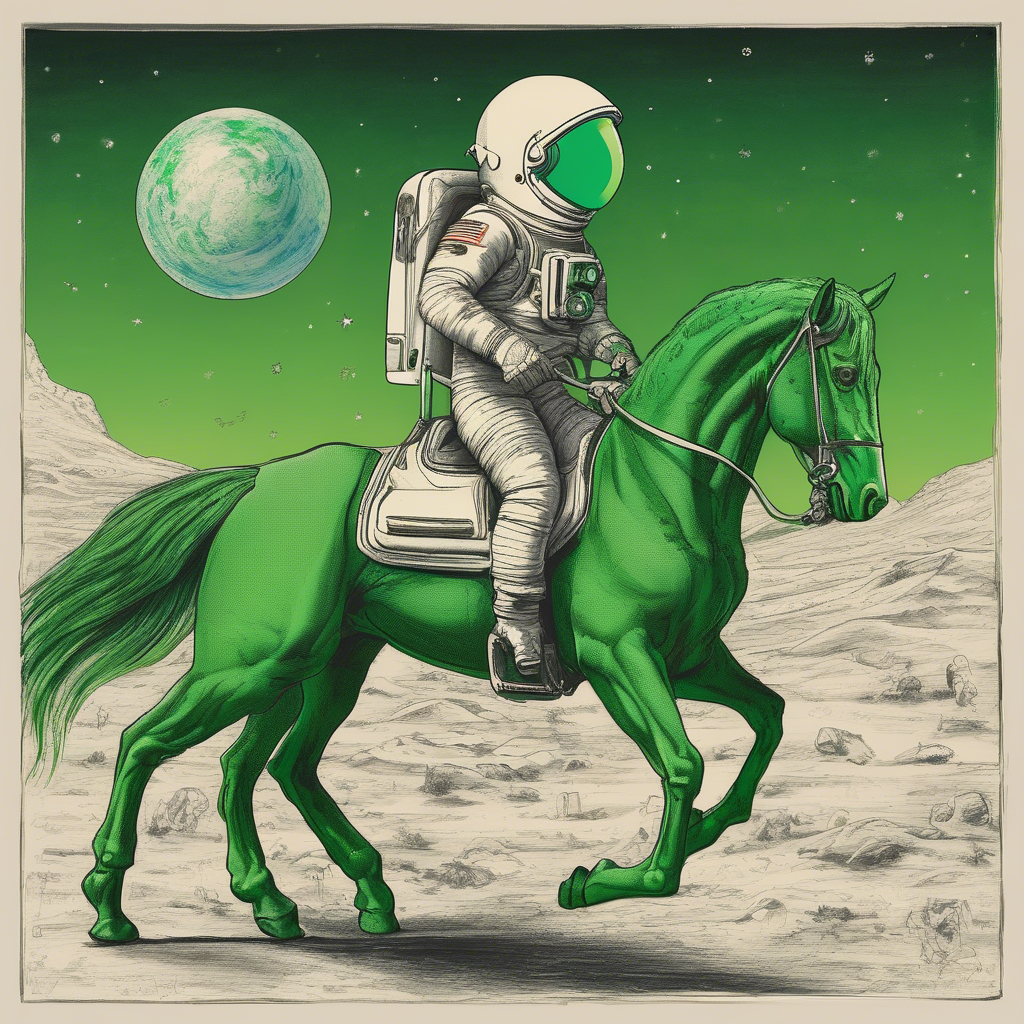

In [ ]:
images

In [5]:
# 개선된 버전은 gpu 메모리를 많이 사용해서 유로버전의 A100이나 또는 런팟이라는 클라우드 기반의 플렛폼을 사용해야 함

In [6]:
from diffusers import DiffusionPipeline
import torch

# load both base & refiner
base = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
)
base.to("cuda")
refiner = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-1.0",
    text_encoder_2=base.text_encoder_2,
    vae=base.vae,
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
)
refiner.to("cuda")

# Define how many steps and what % of steps to be run on each experts (80/20) here
n_steps = 40
high_noise_frac = 0.8

prompt = "A majestic lion jumping from a big stone at night"

# run both experts
image = base(
    prompt=prompt,
    num_inference_steps=n_steps,
    denoising_end=high_noise_frac,
    output_type="latent",
).images
image = refiner(
    prompt=prompt,
    num_inference_steps=n_steps,
    denoising_start=high_noise_frac,
    image=image,
).images[0]


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

model_index.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Fetching 9 files:   0%|          | 0/9 [00:00<?, ?it/s]

unet/config.json:   0%|          | 0.00/1.71k [00:00<?, ?B/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/4.52G [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 82.00 MiB. GPU 0 has a total capacity of 14.75 GiB of which 37.06 MiB is free. Process 4184 has 14.71 GiB memory in use. Of the allocated memory 14.42 GiB is allocated by PyTorch, and 159.07 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
from diffusers import DiffusionPipeline
import torch

pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, use_safetensors=True, variant="fp16")
pipe.to("cuda")

# if using torch < 2.0
# pipe.enable_xformers_memory_efficient_attention()

prompt = "An astronaut riding a green horse"

images = pipe(prompt=prompt).images[0]

In [ ]:
'''
「일요일. 그건 여러 가지 뜻을 가진 날이야요. 휴일, 공일, 안식일, 주일. 어쩌면 사람의 일생도 꼭 그 일요일과 같은 것인지도 몰라요. 어떤 사람은 일요일을 참 즐거운 휴일로 맞이하기도 하고, 또 어떤 사람은 애인과의 약속이 틀어져서 아무것도 하는 일없이 공일로 지내기도 하고, 또 어떤 사람 은 주일로 고스란히 교회에다 바치기도 하고……. 제 일요일은 공일이었어요. 그리고 요한(耀翰) 씨의 일요일은 주일이었어요. 공일과 주일. 그건 하늘과 땅처럼 달라요. 그러나…… 잘 생각해 보 면 같은 점이 하나 있어요. 공일도 또 주일도 둘다 제것이 아니었다는 점, 그 점만은 똑같아요. 제 일요일은 헛되이 우울하게 버려졌어요. 그리고 요한씨의 일요일은 교회에 바쳐졌어요. 받았던 곳으로 다시 바쳐졌어요. 그래요, 저는 그렇게 생각해요. 그리고 지금은 아무것도 안 가진 저와 요한씨가 이렇게 마주 서 있는 거야요.」
20년 만에 만난 그녀의 말이었다.
양 명숙(梁明淑).
그렇게도 사랑하던 명숙이가 술집 마담이 되어 내 앞에 서서 한 말이었다.
그녀는 늙었었다.
그러나 그녀의 눈만은 아직도 옛날처럼 맑고 고왔다. 처음보는 세상에 놀라는 갓난 송아지의 그것처럼 까맣고 윤기 있는 그 순한 두 눈, 어딘가 먼 곳을 바라보는 꿈꾸는 듯한 그 눈.
그녀의 커다란 두 눈에 마침내 샘물처럼 치렁치렁 눈물이 괴는 것이었다.
나는 아무런 말도 하지 못하였다.
그녀의 말대로 나는 아무것도 가지고 있지 못했다.
열정도 용기도, 또 지성도 신앙도, 아니 하다못해 허위나 악덕마저도 내게는 없었다. 완전한 등신이었다.
2
나는 장로의 외아들로 기독교 가정에 태어났다.
그러니까 태아 때부터 나는 예수를 믿은 셈이다.
첫돌을 맞이하던 날 나는 어머니의 품에 안겨서 잠이 든 채 유아 세례를 받았다고 한다. 글자 그대로 그랬다고 한다. 나는 전연 기억하지 못하는 사실이니까. 아버지가 나의 이름을 최(崔)라는 성 밑에다 성경 속에서 나오는 인물을 빌어다가 요한, 최 요한(崔耀翰)이라고 한 것처럼 그것은 아버지와 어머니가 완전히 자기들의 의사에 의하여 그렇게 했을 따름이었다.
말하자면 나의 아버지와 어머니는 하나님 앞에서 나를 장차 하나님을 믿는 아들로 키울 것을 맹세하고 나에 대한 신원보증인이 되기를 서슴지 않았던 것이다.
그만큼 그들은 나를 믿었고 또 아들이란 말을 믿었던 것이라고 할 수 있다.
그들은 나를 업고 교회에 나갔다고 한다.
손목을 끌고 갔다고 한다. 연보돈과 사탕을 사 먹을 돈을 양손에 쥐어 주어서 교회로 보냈다고 한다.
과연 그들은 나를, 즉 아들을 교인을 만드는 데 성공하였다. 나는 교회라는 울타리 안에서 한 걸음도 밖으로 나오지 않고 자랐다. 그리하여 지금 드디어 집사(執事)라는 교회의 직분까지 맡았다. 뿐만 아니라 직장마저 교회 계통 학교인 T고등학교였다.
다들 나를 진실한 교인이라고 하였다. 주일마다 교회에 나가고 또 머리를 수그리고 눈을 감아 소위 기도를 하는 도수가 많은 것을 진실한 교인이라고 한다면 나는 과연 진실한 교인이었다.
남들은 한 주일에 두 번 예배를 보지만 나는 학교에서와 교회에서 한 주일에 수없이 예배를 보니까. 그야말로 생활 전체가 그대로 예배 속에 푹 잠겨 있는 셈이다. 그러니까 나는 최소한으로 쳐도 부지런한 교인이 되는 셈이었다. 그러나 <모든 것은 그저 아버지 하나님의 뜻으로 이루어지는 것입니다>하고 인간 만사를 마치 칠판에 쓴 분필 글씨를 지우개로 지우듯 간단히 해결해 버리는…… 손녀가, 그러니까 나의 딸이 소아마비로 다리를 저는 것까지도 성경 속의 소경의 이야기를 끌어다대어 하나님의 뜻이니라 하고 쉽사리 단념해 버릴 수 있는 그런 아버지의 믿음을 도저히 따라갈 수가 없는 것이었다.
그런데 어찌된 셈인지 나는, 그 딸애가 다리를 절게 된 것은, 결혼을 하고도 아직 옛날의 여인을 못 잊어 늘 마음 한구석에 접어 넣어 두는 그런 죄 때문이라고 나를 원망하는 아내의 말보다, 아버지의 그, 모든 것은 아버지 하나님의 뜻에서라는 어처구니없는 말이 더 불쾌한 것이었다.
그야 아버지 자신이 양복점 쇼우윈도우 안에 남의 이름이 박힌 새 양복을 입고 멍청히 서 있는 마네킨이 되는 것까지는 내 어쩔 수 없는 노릇이었지만, 그렇다고 아들마저 서 있어야 할 아무런 까닭도 나는 발견하지 못하였기 때문이었다.
그래, 아버지의 말대로 나의 딸애가 다리를 절며 애들의 놀림감이 되고는 뒤뜰에 혼자 쭈그리고 앉아서 개미집을 들여다보며 소리 없이 우는 것이 하나님의 뜻이 있어서라면 당장에 두 손바닥과 발등에 굵다란 대못을 땅땅 때려 박는 그런 참혹보다 오히려 몇 배나 더한 그 잔인한 짓의 대가로 얻어지는 하나님의 뜻이란 도대체 무엇인지 나는 알고 싶다.
또 아내의 말대로 그렇게도 악착스러운 벌을 받아야 할 죄를 내가 지었다면 그 벌은 마땅히 나 혼자 받아야 할 것이거늘, 그렇다면 아내는 딸애의 그런 꼴을 보고도 어머니로서 아무런 고통도 느끼지 않는다는 말인가? 어쨌든 나는, 아버지와 아내, 다같이 진실한 기독교 신자이면서 전연 그 질이 다른 두 사람, 좋은 일이나 궂은 일이나 다 하나님의 뜻이라는 아버지와, 또 하나는 좋은 일은 하나님의 은혜이고 궂은 일은 사람의 죄값이라고 생각하는 아내 사이에서, 이것도 저것도 아닌 맹랑한 교인이 되어 버렸다. 불행하게도 나는, 아버지처럼 마음이 태평일 수가 없었다. 마치 주인이 사주는 기차표를 손에 들고 이제 서울로 간다니까 그저 좋아서 얌전하게 시골 역 대합실에 앉아 있던 식모애처럼, 성경 한 권을 옆구리에 끼고 졸고 앉았기엔 내게는 너무나 대합실 창밖의 하늘이 맑고 고왔다.
'''

In [7]:
from transformers import pipeline
from diffusers import DiffusionPipeline
import torch

# 요약을 위한 파이프라인 (Hugging Face 사용)
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# 번역을 위한 파이프라인 (Hugging Face 사용)
translator = pipeline("translation", model="Helsinki-NLP/opus-mt-ko-en")

# Stable Diffusion 파이프라인 설정
pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16"
)
pipe.to("cuda")

# 텍스트 요약 함수
def summarize_text(text):
    return summarizer(text, max_length=150, min_length=50, do_sample=False)[0]['summary_text']

# 한글을 영어로 번역하는 함수
def translate_korean_to_english(text):
    return translator(text, src_lang="ko", tgt_lang="en")[0]['translation_text']

# 주요 사건이나 변화를 기반으로 장면 나누기
def extract_scenes(text):
    sentences = text.split(".")  # 간단히 문장 단위로 분리
    events = []

    # 사건이나 변화가 중요한 부분만 추출
    for sentence in sentences:
        if "장면" in sentence or "시작" in sentence or "도착" in sentence or "만나는" in sentence or "변화" in sentence:
            events.append(sentence.strip())

    return events

# 웹툰 스타일 이미지 생성
def create_webtoon_images(scenes):
    images = []
    for scene in scenes:
        # 각 장면을 요약하고 영어로 번역한 후 이미지 생성
        summarized_scene = summarize_text(scene)
        english_prompt = translate_korean_to_english(summarized_scene)  # 한글을 영어로 번역

        # 이미지 생성
        image = pipe(prompt=english_prompt).images[0]
        images.append(image)

    # 이미지 저장
    for i, img in enumerate(images):
        img.save(f"webtoon_panel_{i+1}.png")

    return images

# 전체 텍스트
text = """
일요일. 그건 여러 가지 뜻을 가진 날이야요. 휴일, 공일, 안식일, 주일. 어쩌면 사람의 일생도 꼭 그 일요일과 같은 것인지도 몰라요. 어떤 사람은 일요일을 참 즐거운 휴일로 맞이하기도 하고, 또 어떤 사람은 애인과의 약속이 틀어져서 아무것도 하는 일없이 공일로 지내기도 하고, 또 어떤 사람 은 주일로 고스란히 교회에다 바치기도 하고……. 제 일요일은 공일이었어요. 그리고 요한(耀翰) 씨의 일요일은 주일이었어요. 공일과 주일. 그건 하늘과 땅처럼 달라요. 그러나…… 잘 생각해 보 면 같은 점이 하나 있어요. 공일도 또 주일도 둘다 제것이 아니었다는 점, 그 점만은 똑같아요. 제 일요일은 헛되이 우울하게 버려졌어요. 그리고 요한씨의 일요일은 교회에 바쳐졌어요. 받았던 곳으로 다시 바쳐졌어요. 그래요, 저는 그렇게 생각해요. 그리고 지금은 아무것도 안 가진 저와 요한씨가 이렇게 마주 서 있는 거야요.
20년 만에 만난 그녀의 말이었다.
양 명숙(梁明淑).
그렇게도 사랑하던 명숙이가 술집 마담이 되어 내 앞에 서서 한 말이었다.
그녀는 늙었었다.
그러나 그녀의 눈만은 아직도 옛날처럼 맑고 고왔다. 처음보는 세상에 놀라는 갓난 송아지의 그것처럼 까맣고 윤기 있는 그 순한 두 눈, 어딘가 먼 곳을 바라보는 꿈꾸는 듯한 그 눈.
그녀의 커다란 두 눈에 마침내 샘물처럼 치렁치렁 눈물이 괴는 것이었다.
나는 아무런 말도 하지 못하였다.
그녀의 말대로 나는 아무것도 가지고 있지 않았다.
...
"""

# 텍스트에서 중요한 장면 추출
scenes = extract_scenes(text)

# 웹툰 이미지 생성
create_webtoon_images(scenes)


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/842k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/813k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 14.75 GiB of which 19.06 MiB is free. Process 4184 has 14.73 GiB memory in use. Of the allocated memory 14.35 GiB is allocated by PyTorch, and 256.64 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
from diffusers import DiffusionPipeline
import torch

# 모델 로딩
pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, use_safetensors=True, variant="fp16")
pipe.to("cuda")

# 웹툰 스타일로 변환을 위한 프롬프트 수정
prompt = "An astronaut riding a green horse, in a vibrant and detailed webtoon style, with bold lines, exaggerated expressions, and colorful, stylized background"

# 이미지 생성
images = pipe(prompt=prompt).images[0]

# 생성된 이미지 보여주기
images.show()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
images